## 第三章 模型搭建和评估--建模

经过前面的两章的知识点的学习，我可以对数数据的本身进行处理，比如数据本身的增删查补，还可以做必要的清洗工作。那么下面我们就要开始使用我们前面处理好的数据了。这一章我们要做的就是使用数据，我们做数据分析的目的也就是，运用我们的数据以及结合我的业务来得到某些我们需要知道的结果。那么分析的第一步就是建模，搭建一个预测模型或者其他模型；我们从这个模型的到结果之后，我们要分析我的模型是不是足够的可靠，那我就需要评估这个模型。今天我们学习建模，下一节我们学习评估。

我们拥有的泰坦尼克号的数据集，那么我们这次的目的就是，完成泰坦尼克号存活预测这个任务。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

载入这些库，如果缺少某些库，请安装他们

【思考】这些库的作用是什么呢？你需要查一查

In [4]:
#思考题回答



In [5]:
%matplotlib inline

 **载入我们提供清洗之后的数据(clear_data.csv)，大家也将原始数据载入（train.csv），说说他们有什么不同**

In [6]:
#写入代码

train = pd.read_csv('train.csv')
train.shape 


(891, 12)

In [7]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data = pd.read_csv('clear_data.csv')

In [9]:
data.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            0       3  22.0      1      0   7.2500           0         1   
1            1       1  38.0      1      0  71.2833           1         0   
2            2       3  26.0      0      0   7.9250           1         0   
3            3       1  35.0      1      0  53.1000           1         0   
4            4       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

### 模型搭建

* 处理完前面的数据我们就得到建模数据，下一步是选择合适模型
* 在进行模型选择之前我们需要先知道数据集最终是进行**监督学习**还是**无监督学习**
* 模型的选择一方面是通过我们的任务来决定的。
* 除了根据我们任务来选择模型外，还可以根据数据样本量以及特征的稀疏性来决定
* 刚开始我们总是先尝试使用一个基本的模型来作为其baseline，进而再训练其他模型做对比，最终选择泛化能力或性能比较好的模型

这里我的建模，并不是从零开始，自己一个人完成完成所有代码的编译。我们这里使用一个机器学习最常用的一个库（sklearn）来完成我们的模型的搭建

**下面给出sklearn的算法选择路径，供大家参考**

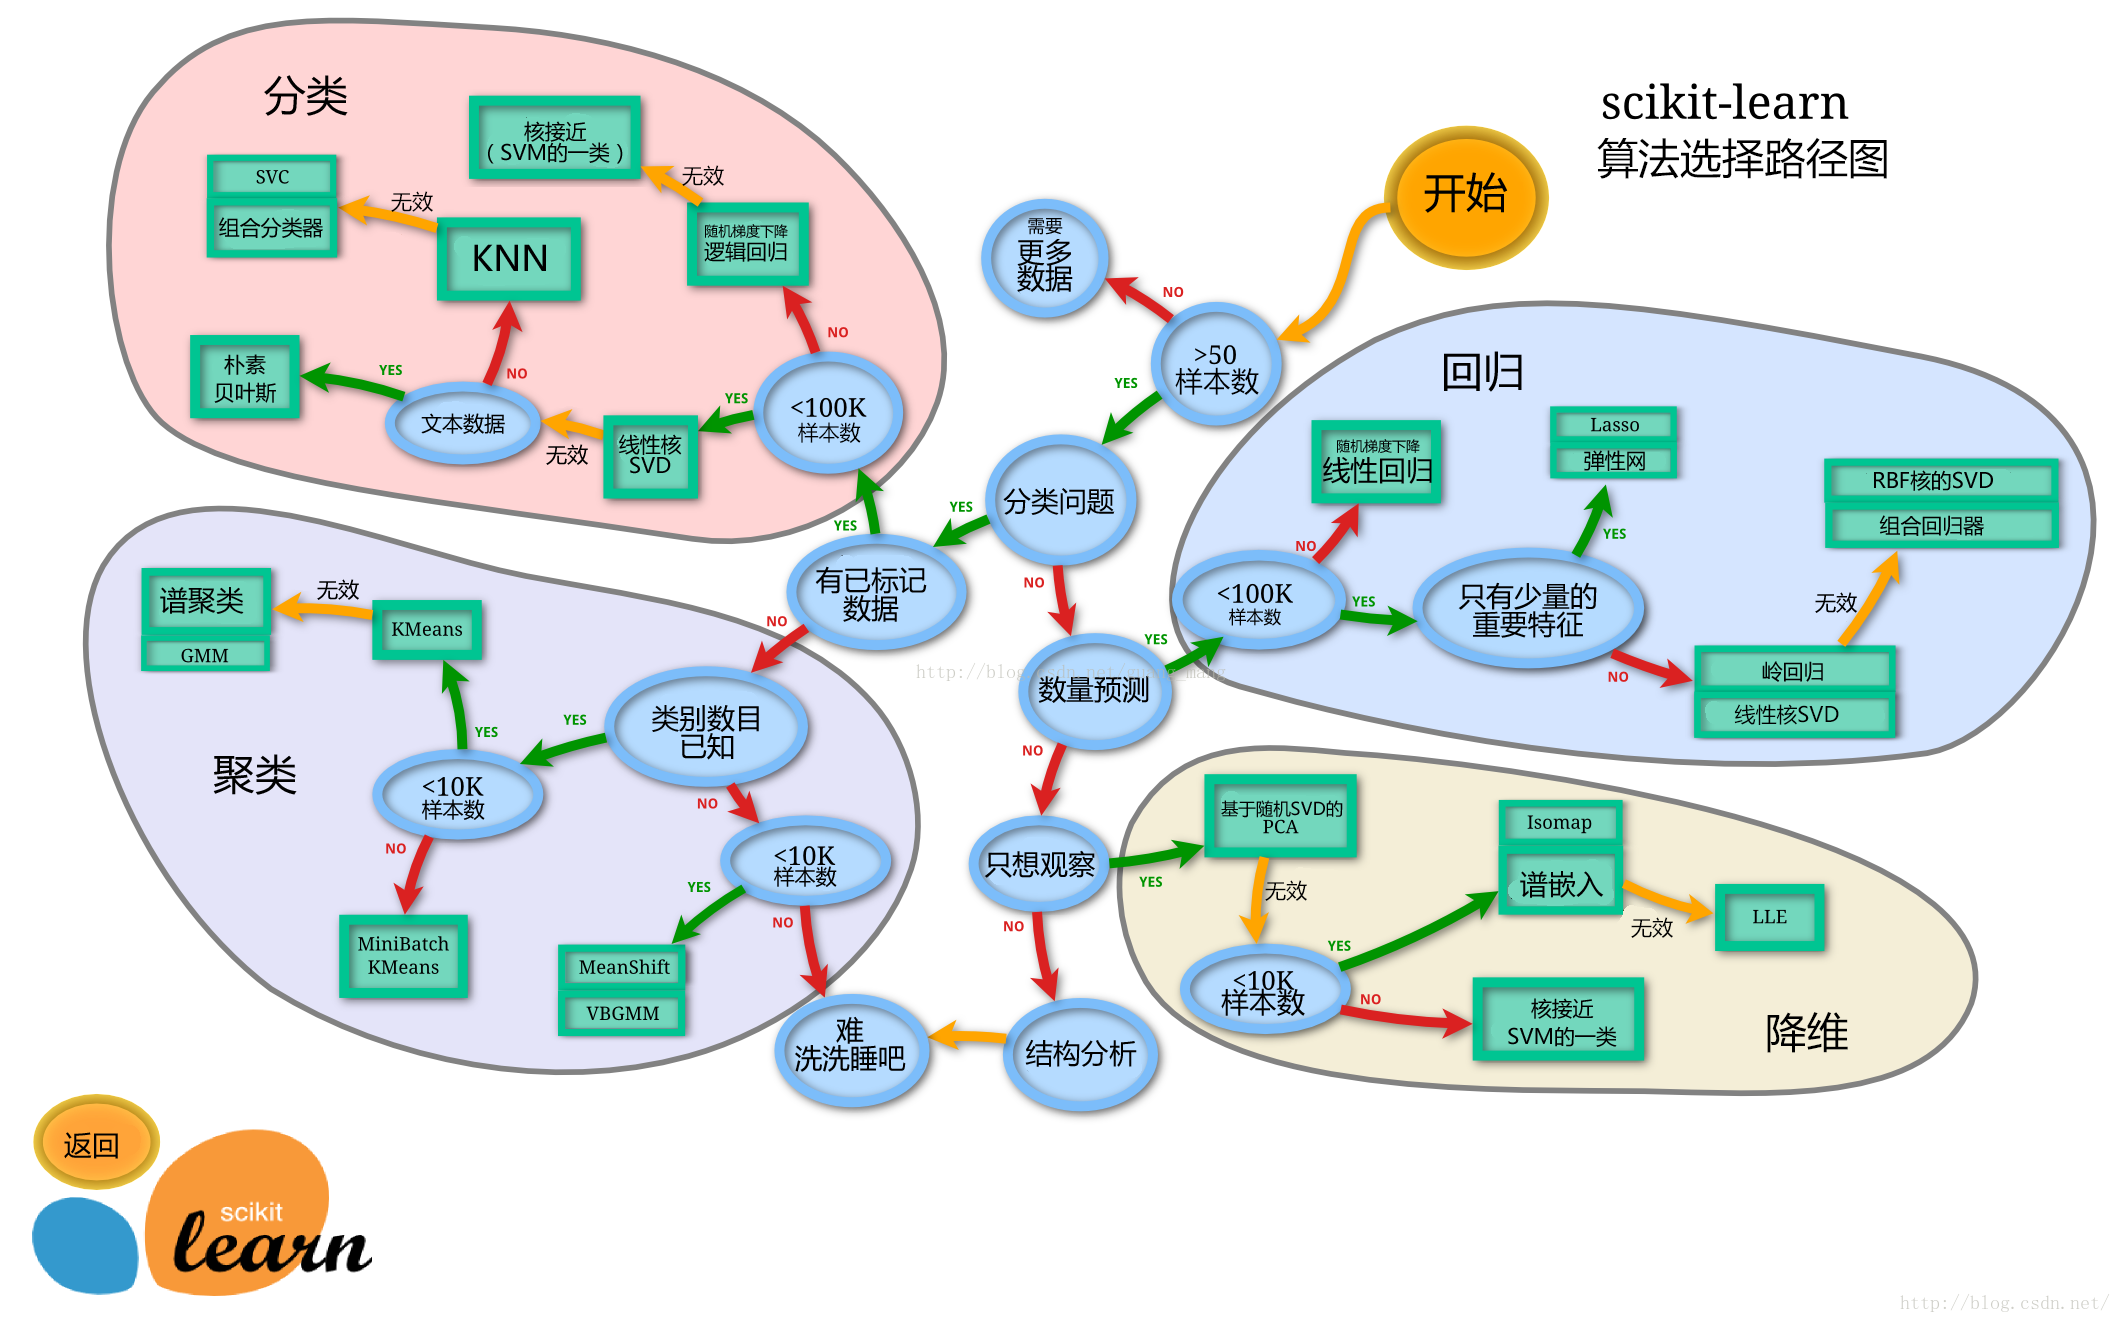

In [9]:
# sklearn模型算法选择路径图
Image('sklearn.png')

【思考】数据集哪些差异会导致模型在拟合数据是发生变化

In [2]:
#思考回答




#### 任务一：切割训练集和测试集
这里使用留出法划分数据集

* 将数据集分为自变量和因变量
* 按比例切割训练集和测试集(一般测试集的比例有30%、25%、20%、15%和10%)
* 使用分层抽样
* 设置随机种子以便结果能复现

【思考】
* 划分数据集的方法有哪些？
* 为什么使用分层抽样，这样的好处有什么？

#### 任务提示1
* 切割数据集是为了后续能评估模型泛化能力
* sklearn中切割数据集的方法为`train_test_split`
* 查看函数文档可以在jupyter noteboo里面使用`train_test_split?`后回车即可看到
* 分层和随机种子在参数里寻找

要从clear_data.csv和train.csv中提取train_test_split()所需的参数

In [16]:
#写入代码
from sklearn.model_selection import train_test_split



In [17]:
#写入代码
X=data
y = train['Survived']



In [18]:
#写入代码
X_train,X_test, y_train,y_test = train_test_split(X,y,stratify=y,random_state=0)
# array-like, default=None
# 如果不为None，则以分层方式切分数据，并将其用作类标签。




In [19]:
#写入代码


X_train.shape,X_test.shape

((668, 11), (223, 11))

【思考】
* 什么情况下切割数据集的时候不用进行随机选取

In [52]:
#思考回答




#### 任务二：模型创建
* 创建基于线性模型的分类模型（逻辑回归）
* 创建基于树的分类模型（决策树、随机森林）
* 分别使用这些模型进行训练，分别的到训练集和测试集的得分
* 查看模型的参数，并更改参数值，观察模型变化

#### 提示
* 逻辑回归不是回归模型而是分类模型，不要与`LinearRegression`混淆
* 随机森林其实是决策树集成为了降低决策树过拟合的情况
* 线性模型所在的模块为`sklearn.linear_model`
* 树模型所在的模块为`sklearn.ensemble`

In [20]:
#写入代码
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [21]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
print("Training set score:: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:: {:.2f}".format(lr.score(X_test,y_test)))

Training set score:: 0.80
Test set score:: 0.79


In [28]:
lr2 = LogisticRegression(C=200)
lr2.fit(X_train, y_train)

D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=200)

In [29]:
print("Training set score: {:.2f}".format(lr2.score(X_train,y_train)))

print("Test set score: {:.2f}".format(lr2.score(X_test,y_test)))

Training set score: 0.80
Test set score: 0.78


In [30]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 1.00
Testing set score: 0.81


In [32]:
# 调整参数后的随机森林分类模型
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [33]:
#写入代码


print("Training set score: {:.2f}".format(rfc2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc2.score(X_test, y_test)))

Training set score: 0.86
Testing set score: 0.80


【思考】
* 为什么线性模型可以进行分类任务，背后是怎么的数学关系
* 对于多分类问题，线性模型是怎么进行分类的

In [69]:
#思考回答



#### 任务三：输出模型预测结果
* 输出模型预测分类标签
* 输出不同分类标签的预测概率

#### 提示3
* 一般监督模型在sklearn里面有个`predict`能输出预测标签，`predict_proba`则可以输出标签概率

In [34]:
#写入代码

pred = lr.predict(X_train)


In [35]:
#写入代码


pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [36]:
#写入代码


pred_proba = lr.predict_proba(X_train)

In [37]:
#写入代码


pred_proba[:10]

array([[0.60880184, 0.39119816],
       [0.17696991, 0.82303009],
       [0.40684332, 0.59315668],
       [0.18910076, 0.81089924],
       [0.87978247, 0.12021753],
       [0.91379826, 0.08620174],
       [0.13287649, 0.86712351],
       [0.90556364, 0.09443636],
       [0.05281642, 0.94718358],
       [0.10934627, 0.89065373]])

【思考】
* 预测标签的概率对我们有什么帮助

In [73]:
#思考回答


